## Kiwoom Opne API log-in

In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import time

from TickerDict import tickers

import process

from pykiwoom.kiwoom import *
kiwoom = Kiwoom()

kiwoom.CommConnect(block=True)
print("블록킹 로그인 완료")

블록킹 로그인 완료


## 1-Day Chart

### Data processing

In [58]:
# Import the dictionary from TickerDict.py

from TickerDict import tickers  # Correctly imports the tickers variable

 # Use tickers
종목명 = input("Enter 종목명(e.g., 삼성전자): ")
date = input("Enter 기준일자 (e.g., 20250119): ")
if 종목명 in tickers:
    code = tickers[종목명]
    print(f"종목명: {종목명}, 종목코드: {tickers[종목명]}")
else:
    print(f"종목명 '{종목명}' not found.")

Enter 종목명(e.g., 삼성전자):  삼성전자
Enter 기준일자 (e.g., 20250119):  20250119
종목명: 삼성전자, 종목코드: 005930


In [10]:
code

'460930'

In [11]:
df = kiwoom.block_request("opt10086",
                          종목코드=code,
                          기준일자=date,
                          표시구분=1,
                          output="일별주가요청",
                          next=1)
df

{'trcode': 'opt10086', 'input': [{'일별주가요청': ['종목코드', '조회일자', '표시구분']}], 'output': [{'일별주가': ['날짜', '시가', '고가', '저가', '종가', '전일비', '등락률', '거래량', '금액(백만)', '신용비', '개인', '기관', '외인수량', '외국계', '프로그램', '외인비', '외인보유', '외인비중', '외인순매수', '기관순매수', '개인순매수', '신용잔고율']}]}


,날짜,시가,고가,저가,종가,전일비,등락률,거래량,금액(백만),신용비,...,외인수량,외국계,프로그램,외인비,외인보유,외인비중,외인순매수,기관순매수,개인순매수,신용잔고율
0,20250122,+20750,+20850,-20000,-20150,-500,-2.42,1149573,23445,0.00,...,0,--45,--492,+0.38,+0.38,+0.38,0,--4,+520,0.00
1,20250121,+20150,+21300,-19960,+20650,+550,+2.74,2750952,56768,2.67,...,+26086,+198,+503,+0.38,+0.38,+0.38,+26086,--15,--514,2.67
2,20250120,+20650,+22350,+19820,+20100,+1290,+6.86,7974403,168408,2.76,...,+24751,+335,+386,+0.31,+0.31,+0.31,+24751,--65,--205,2.76
3,20250117,-18660,+19300,-18510,-18810,-90,-0.48,2034230,38974,2.61,...,+7424,+29,+131,+0.24,+0.24,+0.24,+7424,+79,--9,2.61
4,20250116,+18860,+18900,-18200,+18900,+410,+2.22,1255764,23310,2.44,...,--6900,--18,--145,+0.22,+0.22,+0.22,--6900,+13,+153,2.44
5,20250115,+18670,+19430,-18400,18490,0,0.00,3884488,73462,2.47,...,--105437,--1819,--2126,+0.24,+0.24,+0.24,--105437,--20,+1725,2.47
6,20250114,-16940,+20250,-16850,+18490,+1530,+9.02,17955440,341744,2.14,...,+109466,+1991,+1893,+0.54,+0.54,+0.54,+109466,+13,--1750,2.14
7,20250113,+18020,+18020,-16960,-16960,-840,-4.72,2785962,48440,1.46,...,--126328,--2135,--2280,+0.23,+0.23,+0.23,--126328,--6,+2276,1.46
8,20250110,+14560,+18450,-14420,+17800,+3280,+22.59,21280011,370661,1.53,...,+120867,+2062,+2070,+0.58,+0.58,+0.58,+120867,--1,--1995,1.53
9,20250109,+14700,+14700,-14150,14520,0,0.00,328253,4729,1.52,...,+1536,+79,+21,+0.24,+0.24,+0.24,+1536,+1,--12,1.52


In [12]:

dfs = []
df = kiwoom.block_request("opt10086",
                          종목코드=code,
                          기준일자=date,
                          표시구분=1,
                          output="일별주가요청",
                          next=1)

dfs.append(df)
a=0
while a<2:
    a = a+1
    df = kiwoom.block_request("opt10086",
                          종목코드=code,
                          기준일자=date,
                          표시구분=1,
                          output="일별주가요청",
                          next=2)
    dfs.append(df)
    time.sleep(1)
    
df = pd.concat(dfs, ignore_index=True)


{'trcode': 'opt10086', 'input': [{'일별주가요청': ['종목코드', '조회일자', '표시구분']}], 'output': [{'일별주가': ['날짜', '시가', '고가', '저가', '종가', '전일비', '등락률', '거래량', '금액(백만)', '신용비', '개인', '기관', '외인수량', '외국계', '프로그램', '외인비', '외인보유', '외인비중', '외인순매수', '기관순매수', '개인순매수', '신용잔고율']}]}
{'trcode': 'opt10086', 'input': [{'일별주가요청': ['종목코드', '조회일자', '표시구분']}], 'output': [{'일별주가': ['날짜', '시가', '고가', '저가', '종가', '전일비', '등락률', '거래량', '금액(백만)', '신용비', '개인', '기관', '외인수량', '외국계', '프로그램', '외인비', '외인보유', '외인비중', '외인순매수', '기관순매수', '개인순매수', '신용잔고율']}]}
{'trcode': 'opt10086', 'input': [{'일별주가요청': ['종목코드', '조회일자', '표시구분']}], 'output': [{'일별주가': ['날짜', '시가', '고가', '저가', '종가', '전일비', '등락률', '거래량', '금액(백만)', '신용비', '개인', '기관', '외인수량', '외국계', '프로그램', '외인비', '외인보유', '외인비중', '외인순매수', '기관순매수', '개인순매수', '신용잔고율']}]}


In [14]:
df = df.drop(columns=["신용비", "개인", "기관", "외인수량", "외국계", "외인비", "외인보유", "외인비중", "신용잔고율"])

In [13]:
df.dtypes

날짜        object
시가        object
고가        object
저가        object
종가        object
전일비       object
등락률       object
거래량       object
금액(백만)    object
신용비       object
개인        object
기관        object
외인수량      object
외국계       object
프로그램      object
외인비       object
외인보유      object
외인비중      object
외인순매수     object
기관순매수     object
개인순매수     object
신용잔고율     object
dtype: object

In [15]:
df.dtypes

날짜        object
시가        object
고가        object
저가        object
종가        object
전일비       object
등락률       object
거래량       object
금액(백만)    object
프로그램      object
외인순매수     object
기관순매수     object
개인순매수     object
dtype: object

In [16]:
df.head()

,날짜,시가,고가,저가,종가,전일비,등락률,거래량,금액(백만),프로그램,외인순매수,기관순매수,개인순매수
0,20250122,+20750,+20850,-20000,-20150,-500,-2.42,1149573,23445,--492,0,--4,+520
1,20250121,+20150,+21300,-19960,+20650,+550,+2.74,2750952,56768,+503,+26086,--15,--514
2,20250120,+20650,+22350,+19820,+20100,+1290,+6.86,7974403,168408,+386,+24751,--65,--205
3,20250117,-18660,+19300,-18510,-18810,-90,-0.48,2034230,38974,+131,+7424,+79,--9
4,20250116,+18860,+18900,-18200,+18900,+410,+2.22,1255764,23310,--145,--6900,+13,+153


In [17]:
columns_to_replace = ['프로그램','외인순매수','기관순매수','개인순매수']
df[columns_to_replace] = df[columns_to_replace].replace("--", "-", regex=True)
df.head()

,날짜,시가,고가,저가,종가,전일비,등락률,거래량,금액(백만),프로그램,외인순매수,기관순매수,개인순매수
0,20250122,+20750,+20850,-20000,-20150,-500,-2.42,1149573,23445,-492,0,-4,+520
1,20250121,+20150,+21300,-19960,+20650,+550,+2.74,2750952,56768,+503,+26086,-15,-514
2,20250120,+20650,+22350,+19820,+20100,+1290,+6.86,7974403,168408,+386,+24751,-65,-205
3,20250117,-18660,+19300,-18510,-18810,-90,-0.48,2034230,38974,+131,+7424,+79,-9
4,20250116,+18860,+18900,-18200,+18900,+410,+2.22,1255764,23310,-145,-6900,+13,+153


In [18]:
df.dtypes

날짜        object
시가        object
고가        object
저가        object
종가        object
전일비       object
등락률       object
거래량       object
금액(백만)    object
프로그램      object
외인순매수     object
기관순매수     object
개인순매수     object
dtype: object

In [19]:
# Change the data type of '날짜' to datetime
df["날짜"] = pd.to_datetime(df["날짜"], format="%Y%m%d")

# Change the data type of '등락률' to float
df["등락률"] = df["등락률"].astype(float)

# Change all other columns to int
columns_to_convert = df.columns.difference(["날짜", "등락률"])
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [20]:
# Divide the values in the "금액" column by 100
df["금액(백만)"] = df["금액(백만)"] / 100
# Rename the "금액" column to "금액(억)"
df.rename(columns={"금액(백만)": "금액(억)"}, inplace=True)

In [21]:
df.dtypes

날짜       datetime64[ns]
시가                int32
고가                int32
저가                int32
종가                int32
전일비               int32
등락률             float64
거래량               int32
금액(억)           float64
프로그램              int32
외인순매수             int32
기관순매수             int32
개인순매수             int32
dtype: object

In [22]:
df

,날짜,시가,고가,저가,종가,전일비,등락률,거래량,금액(억),프로그램,외인순매수,기관순매수,개인순매수
0,2025-01-22,20750,20850,-20000,-20150,-500,-2.42,1149573,234.45,-492,0,-4,520
1,2025-01-21,20150,21300,-19960,20650,550,2.74,2750952,567.68,503,26086,-15,-514
2,2025-01-20,20650,22350,19820,20100,1290,6.86,7974403,1684.08,386,24751,-65,-205
3,2025-01-17,-18660,19300,-18510,-18810,-90,-0.48,2034230,389.74,131,7424,79,-9
4,2025-01-16,18860,18900,-18200,18900,410,2.22,1255764,233.10,-145,-6900,13,153
5,2025-01-15,18670,19430,-18400,18490,0,0.00,3884488,734.62,-2126,-105437,-20,1725
6,2025-01-14,-16940,20250,-16850,18490,1530,9.02,17955440,3417.44,1893,109466,13,-1750
7,2025-01-13,18020,18020,-16960,-16960,-840,-4.72,2785962,484.40,-2280,-126328,-6,2276
8,2025-01-10,14560,18450,-14420,17800,3280,22.59,21280011,3706.61,2070,120867,-1,-1995
9,2025-01-09,14700,14700,-14150,14520,0,0.00,328253,47.29,21,1536,1,-12


In [23]:
df = df.iloc[::-1].reset_index(drop=True)
df

,날짜,시가,고가,저가,종가,전일비,등락률,거래량,금액(억),프로그램,외인순매수,기관순매수,개인순매수
0,2024-10-28,-9780,9920,-9750,9900,60,0.61,77522,7.64,388,39339,1,-397
1,2024-10-29,9920,10120,-9850,10090,190,1.92,68913,6.86,136,13675,-40,-88
2,2024-10-30,-9990,10120,-9890,-9940,-150,-1.49,54434,5.42,-56,-5616,-41,84
3,2024-10-31,-9930,9990,-9580,9960,20,0.20,89128,8.72,180,18219,0,-181
4,2024-11-01,9980,9980,-9710,-9860,-100,-1.00,58121,5.69,-21,-2228,-67,88
5,2024-11-04,-9810,10190,-9810,10110,250,2.54,64024,6.45,337,33250,-44,-292
6,2024-11-05,10110,10400,-10090,10180,70,0.69,70393,7.23,203,19807,0,-206
7,2024-11-06,10180,10310,-10000,10300,120,1.18,66953,6.81,209,20615,0,-209
8,2024-11-07,10360,13390,-10280,13390,3090,30.00,5053687,654.55,-2080,-162504,267,1578
9,2024-11-08,15310,15700,14270,14610,1220,9.11,10252610,1534.99,-137,3624,-736,1036


### mplfinance library

In [24]:
df.dtypes

날짜       datetime64[ns]
시가                int32
고가                int32
저가                int32
종가                int32
전일비               int32
등락률             float64
거래량               int32
금액(억)           float64
프로그램              int32
외인순매수             int32
기관순매수             int32
개인순매수             int32
dtype: object

In [25]:
# Rename columns
df = df.rename(columns={
    "날짜": "datetime",
    "시가": "Open",
    "고가": "High",
    "저가": "Low",
    "종가": "Close",
    "거래량": "Volume",       # Optional if volume is available
    "전일비": "Change",       # Change compared to the previous day
    "등락률": "ChangeRate",   # Change rate (percentage)
    "금액(억)": "TradingValue", # Trading value
    "프로그램": "Program",    # Program trading
    "외인순매수": "ForeignNetBuy", # Foreign net buy
    "기관순매수": "InstitutionNetBuy", # Institution net buy
    "개인순매수": "IndividualNetBuy"  # Individual net buy
})

# Check the DataFrame to ensure the columns are renamed correctly



In [26]:
df.head()

,datetime,Open,High,Low,Close,Change,ChangeRate,Volume,TradingValue,Program,ForeignNetBuy,InstitutionNetBuy,IndividualNetBuy
0,2024-10-28,-9780,9920,-9750,9900,60,0.61,77522,7.64,388,39339,1,-397
1,2024-10-29,9920,10120,-9850,10090,190,1.92,68913,6.86,136,13675,-40,-88
2,2024-10-30,-9990,10120,-9890,-9940,-150,-1.49,54434,5.42,-56,-5616,-41,84
3,2024-10-31,-9930,9990,-9580,9960,20,0.20,89128,8.72,180,18219,0,-181
4,2024-11-01,9980,9980,-9710,-9860,-100,-1.00,58121,5.69,-21,-2228,-67,88


In [27]:
# DataFrame의 인덱스를 날짜로 설정 (mplfinance가 요구하는 포맷)
df.set_index("datetime", inplace=True)

In [28]:
df.head()

,Open,High,Low,Close,Change,ChangeRate,Volume,TradingValue,Program,ForeignNetBuy,InstitutionNetBuy,IndividualNetBuy
datetime,,,,,,,,,,,,
2024-10-28,-9780,9920,-9750,9900,60,0.61,77522,7.64,388,39339,1,-397
2024-10-29,9920,10120,-9850,10090,190,1.92,68913,6.86,136,13675,-40,-88
2024-10-30,-9990,10120,-9890,-9940,-150,-1.49,54434,5.42,-56,-5616,-41,84
2024-10-31,-9930,9990,-9580,9960,20,0.20,89128,8.72,180,18219,0,-181
2024-11-01,9980,9980,-9710,-9860,-100,-1.00,58121,5.69,-21,-2228,-67,88


In [29]:
# Apply absolute value transformation to specific columns
columns_to_transform = ["Open", "High", "Low", "Close"]
df[columns_to_transform] = df[columns_to_transform].abs()

In [30]:
df.head()

,Open,High,Low,Close,Change,ChangeRate,Volume,TradingValue,Program,ForeignNetBuy,InstitutionNetBuy,IndividualNetBuy
datetime,,,,,,,,,,,,
2024-10-28,9780,9920,9750,9900,60,0.61,77522,7.64,388,39339,1,-397
2024-10-29,9920,10120,9850,10090,190,1.92,68913,6.86,136,13675,-40,-88
2024-10-30,9990,10120,9890,9940,-150,-1.49,54434,5.42,-56,-5616,-41,84
2024-10-31,9930,9990,9580,9960,20,0.20,89128,8.72,180,18219,0,-181
2024-11-01,9980,9980,9710,9860,-100,-1.00,58121,5.69,-21,-2228,-67,88


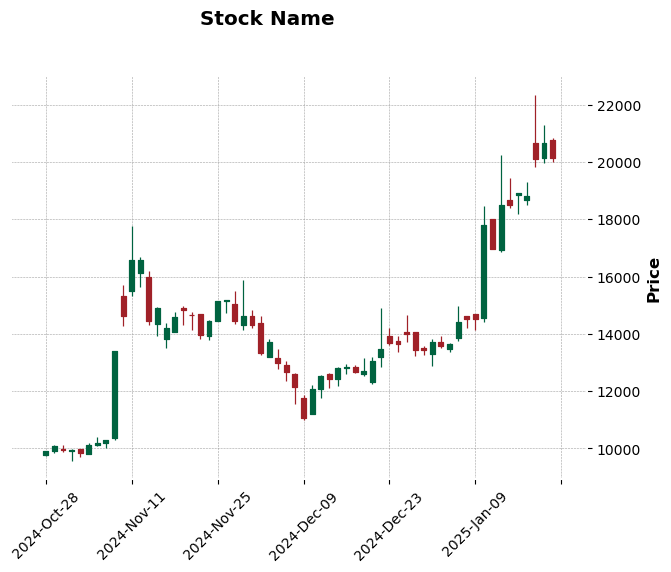

In [31]:
# 2. 봉차트 그리기
mpf.plot(
    df,
    type="candle",  # 봉차트
    style="charles",  # 스타일 (다양한 스타일 지원)
    title="Stock Name",  # 차트 제목
    ylabel="Price",  # y축 라벨
    volume=False  # 거래량 표시 여부 (False로 설정)
)

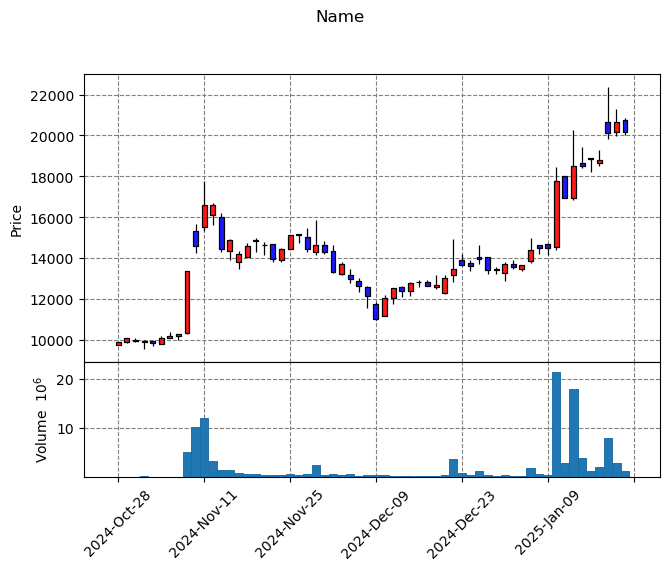

In [32]:
# Custom market colors
custom_colors = mpf.make_marketcolors(
    up="red",    # Custom color for up (e.g., blue)
    down="blue", # Custom color for down (e.g., orange)
    wick="black",  # Wick color
    edge="black"   # Edge color
)

# Custom style with the market colors
custom_style = mpf.make_mpf_style(
    marketcolors=custom_colors, 
    gridcolor="gray",  # Gridline color
    gridstyle="--"     # Gridline style
)


mpf.plot(
    df,
    type="candle",
    style=custom_style,
    title="Name",
    ylabel="Price",
    volume=True  
)


In [33]:
df.head()

,Open,High,Low,Close,Change,ChangeRate,Volume,TradingValue,Program,ForeignNetBuy,InstitutionNetBuy,IndividualNetBuy
datetime,,,,,,,,,,,,
2024-10-28,9780,9920,9750,9900,60,0.61,77522,7.64,388,39339,1,-397
2024-10-29,9920,10120,9850,10090,190,1.92,68913,6.86,136,13675,-40,-88
2024-10-30,9990,10120,9890,9940,-150,-1.49,54434,5.42,-56,-5616,-41,84
2024-10-31,9930,9990,9580,9960,20,0.20,89128,8.72,180,18219,0,-181
2024-11-01,9980,9980,9710,9860,-100,-1.00,58121,5.69,-21,-2228,-67,88


In [34]:
df['10DMA']=df['Close'].rolling(window=10).mean()
df['20DMA']=df['Close'].rolling(window=20).mean()
df['10DMA']

datetime
2024-10-28        NaN
2024-10-29        NaN
2024-10-30        NaN
2024-10-31        NaN
2024-11-01        NaN
2024-11-04        NaN
2024-11-05        NaN
2024-11-06        NaN
2024-11-07        NaN
2024-11-08    10834.0
2024-11-11    11502.0
2024-11-12    12152.0
2024-11-13    12603.0
2024-11-14    13097.0
2024-11-15    13531.0
2024-11-18    13980.0
2024-11-19    14447.0
2024-11-20    14882.0
2024-11-21    14940.0
2024-11-22    14924.0
2024-11-25    14780.0
2024-11-26    14640.0
2024-11-27    14639.0
2024-11-28    14612.0
2024-11-29    14623.0
2024-12-02    14496.0
2024-12-03    14382.0
2024-12-04    14217.0
2024-12-05    14087.0
2024-12-06    13858.0
2024-12-09    13449.0
2024-12-10    13138.0
2024-12-11    12948.0
2024-12-12    12727.0
2024-12-13    12576.0
2024-12-16    12529.0
2024-12-17    12424.0
2024-12-18    12394.0
2024-12-19    12433.0
2024-12-20    12563.0
2024-12-23    12827.0
2024-12-24    12982.0
2024-12-26    13126.0
2024-12-27    13227.0
2024-12-30    13290.0
2

In [35]:
# Calculate 10-day and 20-day moving averages
df["10DMA"] = df["Close"].rolling(window=10).mean()
df["20DMA"] = df["Close"].rolling(window=20).mean()

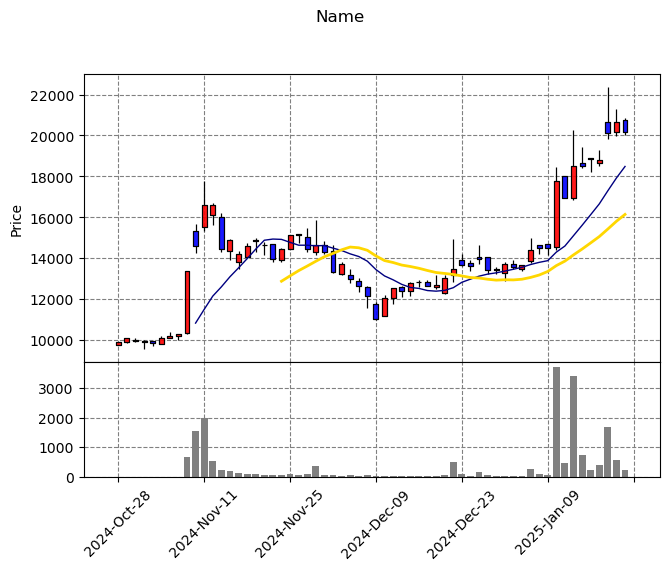

In [36]:
# Custom market colors
custom_colors = mpf.make_marketcolors(
    up="red",    # Custom color for up (e.g., blue)
    down="blue", # Custom color for down (e.g., orange)
    wick="black",  # Wick color
    edge="black"   # Edge color
)

# Custom style with the market colors
custom_style = mpf.make_mpf_style(
    marketcolors=custom_colors, 
    gridcolor="gray",  # Gridline color
    gridstyle="--"     # Gridline style
)

# Define the additional plots for the moving averages
add_plots = [
    mpf.make_addplot(df["10DMA"], color="navy", width=1.0, linestyle="solid"),
    mpf.make_addplot(df["20DMA"], color="gold", width=2.0, linestyle="solid"),
    mpf.make_addplot(df["TradingValue"], panel=1, color="gray", type="bar")
]


mpf.plot(
    df,
    type="candle",
    style=custom_style,
    title="Name",
    ylabel="Price",
    ylabel_lower="Trading Value",
    volume=False,
    addplot=add_plots,
)



In [37]:
import sys

# Print the list of paths
for path in sys.path:
    print(path)


C:\anaconda3\envs\py39_32\python39.zip
C:\anaconda3\envs\py39_32\DLLs
C:\anaconda3\envs\py39_32\lib
C:\anaconda3\envs\py39_32

C:\anaconda3\envs\py39_32\lib\site-packages
C:\anaconda3\envs\py39_32\lib\site-packages\locket-0.2.1-py3.9.egg
C:\anaconda3\envs\py39_32\lib\site-packages\win32
C:\anaconda3\envs\py39_32\lib\site-packages\win32\lib
C:\anaconda3\envs\py39_32\lib\site-packages\Pythonwin


### TickerDict.py generation {stock name: stock code}

In [38]:
# Get tickers for KOSPI and KOSDAQ
kospi_tickers = kiwoom.GetCodeListByMarket("0")  # KOSPI
kosdaq_tickers = kiwoom.GetCodeListByMarket("10")  # KOSDAQ

# Create dictionaries for stock names and codes
kospi_dict = {kiwoom.GetMasterCodeName(code): code for code in kospi_tickers}
kosdaq_dict = {kiwoom.GetMasterCodeName(code): code for code in kosdaq_tickers}

In [39]:
# Combine both dictionaries into one
all_tickers = {**kospi_dict, **kosdaq_dict}

In [40]:
len(kospi_tickers)

2312

In [41]:
len(kospi_dict)

2312

In [42]:
len(all_tickers)

4096

In [43]:
# Save the dictionary to a Python file
with open("TickerDict.py", "w", encoding="utf-8") as f:
    f.write("tickers = {\n")
    for name, code in all_tickers.items():
        f.write(f'    "{name}": "{code}",\n')
    f.write("}\n")

print("TickerDict.py has been created!")

TickerDict.py has been created!


In [ ]:
# Let me process and analyze the uploaded notebook to clean and reorganize it.
import nbformat

# Load the uploaded notebook file
file_path = 'code.ipynb'
with open(file_path, 'r', encoding='utf-8') as file:
    notebook = nbformat.read(file, as_version=4)

# Extract cells to identify unnecessary or unorganized parts
notebook_cells = notebook['cells']
notebook_cells


[{'cell_type': 'markdown',
  'id': '85ca0cd8-8ac2-460b-be95-3692591b123a',
  'metadata': {'tags': []},
  'source': '# 일봉차트 만들기'},
 {'cell_type': 'markdown',
  'id': '471f3baa-ff54-43b8-a2f9-97f457b7a30f',
  'metadata': {},
  'source': '### Data processing'},
 {'cell_type': 'code',
  'execution_count': 4,
  'id': 'f121f45d-becd-4c0a-8f62-0ff4bbe97861',
  'metadata': {},
  'outputs': [],
  'source': 'import pandas as pd'},
 {'cell_type': 'code',
  'execution_count': 5,
  'id': '5cd2ec13-f121-4e0f-9da1-5140ed654fd8',
  'metadata': {},
  'outputs': [],
  'source': 'import mplfinance as mpf'},
 {'cell_type': 'code',
  'execution_count': 6,
  'id': '8e2f7104-80f7-4e3a-8e30-bcfe8fd526a9',
  'metadata': {},
  'outputs': [],
  'source': 'import matplotlib.pyplot as plt'},
 {'cell_type': 'code',
  'execution_count': 48,
  'id': 'db9c8b05-c7cd-483e-841a-c742ae1d72b8',
  'metadata': {},
  'outputs': [],
  'source': 'import time'},
 {'cell_type': 'code',
  'execution_count': 7,
  'id': '484431ab-10

In [62]:
import nbformat

# Path to the Jupyter Notebook
notebook_path = "code.ipynb"
output_path = "code_cells.txt"

# Read the notebook
with open(notebook_path, 'r', encoding='utf-8') as nb_file:
    notebook = nbformat.read(nb_file, as_version=4)

# Extract code cells
code_cells = [
    cell['source'] for cell in notebook['cells'] if cell['cell_type'] == 'code'
]

# Write the code cells to a text file
with open(output_path, 'w', encoding='utf-8') as txt_file:
    for code in code_cells:
        txt_file.write(code + '\n\n')  # Add extra line for separation

print(f"Code cells have been saved to {output_path}")


Code cells have been saved to code_cells.txt


## 1-Minute Chart

In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import time

from TickerDict import tickers

import process

from pykiwoom.kiwoom import *
kiwoom = Kiwoom()

kiwoom.CommConnect(block=True)
print("블록킹 로그인 완료")

블록킹 로그인 완료


In [3]:
def minute_candlestick(stock_name, tick=1, max_requests=1):
        """Fetch stock data for a given stock name and tick range."""
        stock_name = stock_name
        code = tickers.get(stock_name, None)  # Use self.tickers by default
        if not code:
            raise ValueError(f"Stock name '{stock_name}' not found in tickers.")

        dfs = []
        for request_num in range(max_requests):
            next_flag = 1 if request_num == 0 else 2
            df = kiwoom.block_request(
                "opt10080",
                종목코드=code,
                틱범위=tick,
                표시구분=1,
                output="일별주가요청",
                next=next_flag
            )
            dfs.append(df)
            time.sleep(1)
        df = pd.concat(dfs, ignore_index=True)
        return df

In [4]:
df = minute_candlestick('한화시스템')

{'trcode': 'opt10080', 'input': [{'주식분봉차트조회요청': ['종목코드', '틱범위', '수정주가구분']}], 'output': [{'주식분차트': ['종목코드']}, {'주식분봉차트조회': ['현재가', '거래량', '체결시간', '시가', '고가', '저가', '수정주가구분', '수정비율', '대업종구분', '소업종구분', '종목정보', '수정주가이벤트', '전일종가']}]}


In [5]:
df

,현재가,거래량,체결시간,시가,고가,저가,수정주가구분,수정비율,대업종구분,소업종구분,종목정보,수정주가이벤트,전일종가
0,+32850,10702,20250212151200,+32850,+32850,+32850,,,,,,,
1,+32850,18845,20250212151100,+32850,+32850,+32850,,,,,,,
2,+32850,186619,20250212151000,+32800,+32850,+32800,,,,,,,
3,+32850,77028,20250212150900,+32800,+32850,+32750,,,,,,,
4,+32750,30981,20250212150800,+32800,+32800,+32750,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,+25450,1497,20250210125800,+25400,+25450,+25400,,,,,,,
896,+25450,2152,20250210125700,+25400,+25450,+25400,,,,,,,
897,+25400,3512,20250210125600,+25450,+25500,+25400,,,,,,,
898,+25500,1384,20250210125500,+25450,+25500,+25450,,,,,,,


In [16]:
df.dtypes

현재가        object
거래량        object
체결시간       object
시가         object
고가         object
저가         object
수정주가구분     object
수정비율       object
대업종구분      object
소업종구분      object
종목정보       object
수정주가이벤트    object
전일종가       object
dtype: object

In [6]:
def minute_processing(df):
    """Clean and preprocess the stock data."""
    # Drop unnecessary columns
    columns_to_drop = ["수정주가구분", "수정비율", "대업종구분", "소업종구분", "종목정보", "수정주가이벤트", "전일종가"]
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # drop rows under 420
    df = df.iloc[:420]

    # Convert data types
    df["체결시간"] = pd.to_datetime(df["체결시간"], format="%Y%m%d%H%M%S")

    columns_to_convert = df.columns.difference(["체결시간"])
    df[columns_to_convert] = df[columns_to_convert].astype(int, errors='ignore')

    # Reorder columns
    df = df[["체결시간", "시가", "고가", "저가", "현재가", "거래량"]]

    # Rename columns
    df = df.rename(columns={
        "체결시간": "datetime",
        "시가": "Open",
        "고가": "High",
        "저가": "Low",
        "현재가": "Close",
        "거래량": "Volume"
    })
    # 거래대금(tradingvalue)열을 추가
    df['TradingValue'] = ((df['Volume'] * ((df['Open'] + df['High'] + df['Low'] + df['Close']) / 4)) / 100000000.0).round(3)





    # Set datetime as the index
    df.set_index("datetime", inplace=True)

    # Apply absolute value transformation to specific columns
    columns_to_transform = ["Open", "High", "Low", "Close"]
    df[columns_to_transform] = df[columns_to_transform].abs()



    # Transform data
    #df = df.iloc[::-1].reset_index(drop=True)

    return df

In [7]:
df = minute_processing(df)

In [40]:
df

,Open,High,Low,Close,Volume,TradingValue
datetime,,,,,,
2025-02-11 14:32:00,25300,25300,25250,25300,5158,1.304
2025-02-11 14:33:00,25250,25300,25250,25250,1817,0.459
2025-02-11 14:34:00,25300,25300,25250,25300,10596,2.679
2025-02-11 14:35:00,25300,25350,25250,25350,8932,2.261
2025-02-11 14:36:00,25350,25350,25300,25300,4194,1.062
...,...,...,...,...,...,...
2025-02-12 15:08:00,32800,32800,32750,32750,30981,10.154
2025-02-12 15:09:00,32800,32850,32750,32850,77028,25.275
2025-02-12 15:10:00,32800,32850,32800,32850,186619,61.258


In [12]:
df.dtypes

Open              int32
High              int32
Low               int32
Close             int32
Volume            int32
TradingValue    float64
dtype: object

### minute_data를 db에저장

In [33]:
import pymysql
class DBsave:
    def __init__(self, host='127.0.0.1', user='root', password='219423', db='trading', charset='utf8mb4'):
        """
        데이터베이스에 연결하고 커서를 초기화합니다.
        """
        self.conn = pymysql.connect(
            host=host,
            user=user,
            password=password,
            db=db,
            charset=charset
        )
        self.cur = self.conn.cursor()
    def minute_candlestick(self, stock_name, date, df):
        table_query = f"""
        CREATE TABLE IF NOT EXISTS minute_{date}_{stock_name} (
            datetime DATETIME,
            Open INT,
            High INT,
            Low INT,
            Close INT,
            Volume INT,
            TradingValue FLOAT,
            PRIMARY KEY (datetime)
        );
        """
        self.cur.execute(table_query)
    
        insert_query = f"""
        INSERT IGNORE INTO minute_{date}_{stock_name} (
            datetime, Open, High, Low, Close, Volume, TradingValue
        ) VALUES (%s, %s, %s, %s, %s, %s, %s);
        """
    # DataFrame의 각 행을 순회하며 데이터를 삽입합니다.
        for index, row in df.iterrows():
            self.cur.execute(insert_query, (
                index,  # DataFrame의 인덱스가 datetime 값
                row["Open"],
                row["High"],
                row["Low"],
                row["Close"],
                row["Volume"],
                row["TradingValue"]
            ))
        # 모든 삽입 작업 후 commit
        self.conn.commit()

In [34]:
data_save = DBsave()
data_save.minute_candlestick('한화시스템','20250211',df)

### minute_data를 db에서 load

In [35]:
class DBload:
    def __init__(self, host='127.0.0.1', user='root', password='219423', db='trading', charset='utf8mb4'):
        """
        데이터베이스 연결을 초기화합니다.
        """
        self.conn = pymysql.connect(
            host=host,
            user=user,
            password=password,
            db=db,
            charset=charset
        )
        self.cur = self.conn.cursor()
    
    def minute_candlestick(self, stock_name, date):
        """
        stock_name과 date를 조합한 테이블에서 데이터를 읽어 DataFrame으로 반환합니다.
        예를 들어, stock_name이 '현대힘스'이고 date가 '20250210'이면,
        '20250210현대힘스' 테이블에서 데이터를 읽어옵니다.
        """
        query = f"SELECT * FROM minute_{date}_{stock_name}"
        df = pd.read_sql(query, self.conn)
        
        # datetime 컬럼을 인덱스로 설정하고 datetime 형식으로 변환
        df.set_index("datetime", inplace=True)
        df.index = pd.to_datetime(df.index)
        return df

In [36]:
data_load = DBload()
df = data_load.minute_candlestick('한화시스템','20250211')

In [37]:
df

,Open,High,Low,Close,Volume,TradingValue
datetime,,,,,,
2025-02-11 14:32:00,25300,25300,25250,25300,5158,1.304
2025-02-11 14:33:00,25250,25300,25250,25250,1817,0.459
2025-02-11 14:34:00,25300,25300,25250,25300,10596,2.679
2025-02-11 14:35:00,25300,25350,25250,25350,8932,2.261
2025-02-11 14:36:00,25350,25350,25300,25300,4194,1.062
...,...,...,...,...,...,...
2025-02-12 15:08:00,32800,32800,32750,32750,30981,10.154
2025-02-12 15:09:00,32800,32850,32750,32850,77028,25.275
2025-02-12 15:10:00,32800,32850,32800,32850,186619,61.258


In [11]:
# %matplotlib notebook

In [38]:

def minute_candlestick(df):
    # Transform data
    #df = df.iloc[::-1]
    """Plot the candlestick chart with moving averages."""
    custom_colors = mpf.make_marketcolors(up="red", down="blue", wick="black", edge="black")
    custom_style = mpf.make_mpf_style(marketcolors=custom_colors, gridcolor="gray", gridstyle="--")

    # Check if the DataFrame contains 10DMA and 20DMA columns
    if "10DMA" in df.columns and "20DMA" in df.columns:
        add_plots = [
            mpf.make_addplot(df["10DMA"], color="navy", width=1.0, linestyle="solid"),
            mpf.make_addplot(df["20DMA"], color="gold", width=2.0, linestyle="solid"),
            mpf.make_addplot(df["TradingValue"], panel=1, color="gray", type="bar")
        ]
    else:
        add_plots = [
            mpf.make_addplot(df["Volume"], panel=1, color="gray", type="bar")
        ]

    # Create a Matplotlib Figure and Axes objects
    fig, axlist = mpf.plot(
    df,
    type="candle",
    style=custom_style,
    title="Interactive Candlestick Chart",
    ylabel="Price",
    ylabel_lower="Volume",
    volume=False,
    addplot=add_plots,
    returnfig=True,  # This returns the figure and axes
    figratio=(25, 9),  # Set the aspect ratio (width:height)
    figscale=10      # Scale the entire figure size
    )

    # Enable interactive mode in Matplotlib
    plt.ion()  # Turn on interactive mode
    plt.show()  # Display the plot

    return fig, axlist


In [39]:
fig, axlist = minute_candlestick(df)

In [21]:
print(type(fig))  # <class 'matplotlib.figure.Figure'>
print(type(axlist))

<class 'matplotlib.figure.Figure'>
<class 'list'>


In [25]:
print(axlist)

[<Axes:ylabel='Price'>, <Axes:>, <Axes:>, <Axes:>]


In [19]:
# %matplotlib notebook
# import matplotlib.pyplot as plt

# # Example plot
# plt.plot([1, 2, 3], [4, 5, 6])
# plt.show()


<IPython.core.display.Javascript object>

In [1]:
# pip install meson-python

  Using cached meson-1.7.0-py3-none-any.whl (990 kB)
  Using cached pyproject_metadata-0.9.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install ipympl

In [1]:
pip show ipympl

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install nbmerge

  Created wheel for nbmerge: filename=nbmerge-0.0.4-py2.py3-none-any.whl size=6413 sha256=4922aec554000a9d77cd3a81504d23bfadd1293f8661e5d9a1bf9a112548e965
  Stored in directory: c:\users\손민구\appdata\local\pip\cache\wheels\0b\a8\31\4ae563f674b488c82ee72cfe0f86487c21532db97ae910b264
Successfully built nbmerge
Note: you may need to restart the kernel to use updated packages.


In [2]:
!nbmerge DayChart.ipynb lab.ipynb pymysql.ipynb > merged.ipynb

## KiwoomAPI 사용법

### 체결량TR 요청

In [5]:
df = kiwoom.block_request("opt10086",
                          종목코드='460930',
                          기준일자='20250123',
                          표시구분=1,
                          output="일별주가요청",
                          next=1)
df

{'trcode': 'opt10086', 'input': [{'일별주가요청': ['종목코드', '조회일자', '표시구분']}], 'output': [{'일별주가': ['날짜', '시가', '고가', '저가', '종가', '전일비', '등락률', '거래량', '금액(백만)', '신용비', '개인', '기관', '외인수량', '외국계', '프로그램', '외인비', '외인보유', '외인비중', '외인순매수', '기관순매수', '개인순매수', '신용잔고율']}]}


,날짜,시가,고가,저가,종가,전일비,등락률,거래량,금액(백만),신용비,...,외인수량,외국계,프로그램,외인비,외인보유,외인비중,외인순매수,기관순매수,개인순매수,신용잔고율
0,20250124,+20100,+20150,-19210,+19630,+50,+0.26,1080092,21175,3.01,...,--61342,--62,--1221,+0.40,+0.40,+0.40,--61342,+7,+1430,3.01
1,20250123,20150,+20250,-19380,-19580,-570,-2.83,1068864,21013,2.94,...,+91996,+704,+1797,+0.57,+0.57,+0.57,+91996,+67,--1885,2.94
2,20250122,+20750,+20850,-20000,-20150,-500,-2.42,1196511,24384,2.88,...,--24295,--247,--492,+0.31,+0.31,+0.31,--24295,--4,+507,2.88
3,20250121,+20150,+21300,-19960,+20650,+550,+2.74,2750952,56768,2.67,...,+26086,+198,+503,+0.38,+0.38,+0.38,+26086,--15,--514,2.67
4,20250120,+20650,+22350,+19820,+20100,+1290,+6.86,7974403,168408,2.76,...,+24751,+335,+386,+0.31,+0.31,+0.31,+24751,--65,--205,2.76
5,20250117,-18660,+19300,-18510,-18810,-90,-0.48,2034230,38974,2.61,...,+7424,+29,+131,+0.24,+0.24,+0.24,+7424,+79,--9,2.61
6,20250116,+18860,+18900,-18200,+18900,+410,+2.22,1255764,23310,2.44,...,--6900,--18,--145,+0.22,+0.22,+0.22,--6900,+13,+153,2.44
7,20250115,+18670,+19430,-18400,18490,0,0.00,3884488,73462,2.47,...,--105437,--1819,--2126,+0.24,+0.24,+0.24,--105437,--20,+1725,2.47
8,20250114,-16940,+20250,-16850,+18490,+1530,+9.02,17955440,341744,2.14,...,+109466,+1991,+1893,+0.54,+0.54,+0.54,+109466,+13,--1750,2.14
9,20250113,+18020,+18020,-16960,-16960,-840,-4.72,2785962,48440,1.46,...,--126328,--2135,--2280,+0.23,+0.23,+0.23,--126328,--6,+2276,1.46


In [10]:
df = kiwoom.block_request("opt10003",
                          종목코드='460930',
                          output="요청",
                          next=1)
df.dtypes

{'trcode': 'opt10003', 'input': [{'체결정보요청': ['종목코드']}], 'output': [{'체결정보': ['시간', '현재가', '전일대비', '대비율', '우선매도호가단위', '우선매수호가단위', '체결거래량', 'sign', '누적거래량', '누적거래대금', '체결강도']}]}


시간          object
현재가         object
전일대비        object
대비율         object
우선매도호가단위    object
우선매수호가단위    object
체결거래량       object
sign        object
누적거래량       object
누적거래대금      object
체결강도        object
dtype: object

In [10]:
import pandas as pd
import time

def execution(stock_name, max_requests=5000, stop_time="155000"):
    """
    Fetch stock data for a given stock name and stop when the '시간' column contains a value earlier than the stop_time.
    """
    code = tickers.get(stock_name, None)  # Use tickers dictionary
    if not code:
        raise ValueError(f"Stock name '{stock_name}' not found in tickers.")

    dfs = []
    for request_num in range(max_requests):
        # Determine next_flag (1 for first request, 2 for subsequent requests)
        next_flag = 1 if request_num == 0 else 2
        
        # Fetch data from the API
        df = kiwoom.block_request(
            "opt10003",
            종목코드=code,
            output="일별주가요청",
            next=next_flag
        )
        dfs.append(df)

        # Combine all the DataFrames to check the full result
        combined_df = pd.concat(dfs, ignore_index=True)

        # Check if the stop condition is met
        if (combined_df["시간"].astype(str) < stop_time).any():  # Ensure "시간" column is treated as string
            break

        time.sleep(1)  # Respect rate limits (adjust if necessary)
    print(request_num)
    # Return the combined DataFrame
    return combined_df


In [ ]:
df2 = execution('대영포장',stop_time='090000')

{'trcode': 'opt10003', 'input': [{'체결정보요청': ['종목코드']}], 'output': [{'체결정보': ['시간', '현재가', '전일대비', '대비율', '우선매도호가단위', '우선매수호가단위', '체결거래량', 'sign', '누적거래량', '누적거래대금', '체결강도']}]}
{'trcode': 'opt10003', 'input': [{'체결정보요청': ['종목코드']}], 'output': [{'체결정보': ['시간', '현재가', '전일대비', '대비율', '우선매도호가단위', '우선매수호가단위', '체결거래량', 'sign', '누적거래량', '누적거래대금', '체결강도']}]}
{'trcode': 'opt10003', 'input': [{'체결정보요청': ['종목코드']}], 'output': [{'체결정보': ['시간', '현재가', '전일대비', '대비율', '우선매도호가단위', '우선매수호가단위', '체결거래량', 'sign', '누적거래량', '누적거래대금', '체결강도']}]}
{'trcode': 'opt10003', 'input': [{'체결정보요청': ['종목코드']}], 'output': [{'체결정보': ['시간', '현재가', '전일대비', '대비율', '우선매도호가단위', '우선매수호가단위', '체결거래량', 'sign', '누적거래량', '누적거래대금', '체결강도']}]}
{'trcode': 'opt10003', 'input': [{'체결정보요청': ['종목코드']}], 'output': [{'체결정보': ['시간', '현재가', '전일대비', '대비율', '우선매도호가단위', '우선매수호가단위', '체결거래량', 'sign', '누적거래량', '누적거래대금', '체결강도']}]}
{'trcode': 'opt10003', 'input': [{'체결정보요청': ['종목코드']}], 'output': [{'체결정보': ['시간', '현재가', '전일대비', '대비율', '우선매도호가단위', '우선

In [ ]:
df2

In [5]:
df['시간'].astype(str)

0       155807
1       155519
2       155511
3       155056
4       155021
         ...  
5965    105901
5966    105858
5967    105857
5968    105855
5969    105853
Name: 시간, Length: 5970, dtype: object

## DB에 저장
- kiwoomAPI로 TR요청하여 가져온 데이터를 db에 저장

In [ ]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import time
from TickerDict import tickers
import process

In [2]:
from pykiwoom.kiwoom import *
kiwoom = Kiwoom()

kiwoom.CommConnect(block=True)
print("블록킹 로그인 완료")

블록킹 로그인 완료


In [ ]:
sss = process.GetData(kiwoom)

df = sss.get_stock_data('필옵틱스','20250211', max_requests=2)

df = sss.preprocess_data(df)

{'trcode': 'opt10086', 'input': [{'일별주가요청': ['종목코드', '조회일자', '표시구분']}], 'output': [{'일별주가': ['날짜', '시가', '고가', '저가', '종가', '전일비', '등락률', '거래량', '금액(백만)', '신용비', '개인', '기관', '외인수량', '외국계', '프로그램', '외인비', '외인보유', '외인비중', '외인순매수', '기관순매수', '개인순매수', '신용잔고율']}]}
{'trcode': 'opt10086', 'input': [{'일별주가요청': ['종목코드', '조회일자', '표시구분']}], 'output': [{'일별주가': ['날짜', '시가', '고가', '저가', '종가', '전일비', '등락률', '거래량', '금액(백만)', '신용비', '개인', '기관', '외인수량', '외국계', '프로그램', '외인비', '외인보유', '외인비중', '외인순매수', '기관순매수', '개인순매수', '신용잔고율']}]}


In [15]:
df

,Open,High,Low,Close,Changes,ChangeRate,Volume,TradingValue,Program,ForeignNetBuy,InstitutionNetBuy,IndividualNetBuy
datetime,,,,,,,,,,,,
2025-01-09,24500,26800,24000,24700,1800,7.86,11911834,3043.66,2517,118497,-1316,-2255
2025-01-10,25950,26000,24250,24600,-100,-0.40,2298744,576.63,-2015,-90452,25,1768
2025-01-13,24300,25650,24150,24400,-200,-0.81,1385678,344.15,-168,8642,-390,-367
2025-01-14,25750,27400,25550,26400,2000,8.20,6674699,1767.71,1553,59559,1981,-3866
2025-01-15,26000,26950,25350,25850,-550,-2.08,2144086,564.16,-2039,-60450,-155,2218
2025-01-16,27850,28400,26450,26600,750,2.90,2782632,759.02,-77,-15172,1109,-414
2025-01-17,26500,33400,26150,31050,4450,16.73,16791418,5151.05,16367,653560,2290,-16105
2025-01-20,30700,31800,29800,30400,-650,-2.09,3192857,984.82,-11785,-371717,88,11160
2025-01-21,30500,31300,30050,30800,400,1.32,2174277,666.75,-5615,-200841,1021,4921


In [16]:
import pymysql

# 데이터베이스 연결 설정
conn = pymysql.connect(
    host='127.0.0.1',
    user='root',
    password='219423',
    db='trading',
    charset='utf8mb4')



cur = conn.cursor()

In [13]:
def creat_table(stock_name, date):
    table_query = f"""
    CREATE TABLE IF NOT EXISTS {date}{stock_name} (
    datetime DATE,
    Open INT,
    High INT,
    Low INT,
    Close INT,
    Changes INT,
    ChangeRate FLOAT,
    Volume INT,
    TradingValue FLOAT,
    Program INT,
    ForeignNetBuy INT,
    InstitutionNetBuy INT,
    IndividualNetBuy INT
    );
    """
    cur.execute(table_query)
    return table_query


In [14]:
a = creat_table('현대힘스','20250210')

In [30]:
# SQL Insert Query
def insert_table(stock_name, date):
    insert_query = f"""
    INSERT INTO {date}{stock_name} (
        datetime, Open, High, Low, Close, Changes, ChangeRate, Volume, TradingValue, Program,
        ForeignNetBuy, InstitutionNetBuy, IndividualNetBuy
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
    """

    # Iterate over DataFrame rows and insert them into the table
    for index, row in df.iterrows():
        cur.execute(insert_query, (
            index,  # datetime is the index in your DataFrame
            row["Open"],
            row["High"],
            row["Low"],
            row["Close"],
            row["Changes"],
            row["ChangeRate"],
            row["Volume"],
            row["TradingValue"],
            row["Program"],
            row["ForeignNetBuy"],
            row["InstitutionNetBuy"],
            row["IndividualNetBuy"]
        ))
    


In [31]:
b = insert_table('현대힘스','20250210')

# Commit the transaction
conn.commit()

In [21]:
import pymysql
import pandas as pd

class DBsave:
    def __init__(self, host='127.0.0.1', user='root', password='219423', db='trading', charset='utf8mb4'):
        """
        데이터베이스에 연결하고 커서를 초기화합니다.
        """
        self.conn = pymysql.connect(
            host=host,
            user=user,
            password=password,
            db=db,
            charset=charset
        )
        self.cur = self.conn.cursor()
    
    def create_table(self, stock_name, date):
        """
        주어진 stock_name과 date를 조합하여 테이블을 생성합니다.
        예: date가 '20250210'이고 stock_name이 '현대힘스'이면 테이블 이름은 '20250210현대힘스'
        """
        table_query = f"""
        CREATE TABLE IF NOT EXISTS {date}{stock_name} (
            datetime DATE,
            Open INT,
            High INT,
            Low INT,
            Close INT,
            Changes INT,
            ChangeRate FLOAT,
            Volume INT,
            TradingValue FLOAT,
            Program INT,
            ForeignNetBuy INT,
            InstitutionNetBuy INT,
            IndividualNetBuy INT,
            PRIMARY KEY (datetime)
        );
        """
        self.cur.execute(table_query)
        # 테이블 생성 쿼리 반환(디버깅용)
        return table_query

    def insert_table(self, stock_name, date, df):
        """
        주어진 DataFrame(df)의 데이터를 지정한 테이블에 삽입합니다.
        테이블 이름은 date와 stock_name을 조합한 것으로 가정합니다.
        DataFrame의 인덱스는 datetime 값이며, 각 컬럼은 테이블 컬럼과 일치해야 합니다.
        """
        insert_query = f"""
        INSERT IGNORE INTO {date}{stock_name} (
            datetime, Open, High, Low, Close, Changes, ChangeRate, Volume, TradingValue, Program,
            ForeignNetBuy, InstitutionNetBuy, IndividualNetBuy
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
        """
        # DataFrame의 각 행을 순회하며 데이터를 삽입합니다.
        for index, row in df.iterrows():
            self.cur.execute(insert_query, (
                index,  # DataFrame의 인덱스가 datetime 값
                row["Open"],
                row["High"],
                row["Low"],
                row["Close"],
                row["Changes"],
                row["ChangeRate"],
                row["Volume"],
                row["TradingValue"],
                row["Program"],
                row["ForeignNetBuy"],
                row["InstitutionNetBuy"],
                row["IndividualNetBuy"]
            ))
        # 모든 삽입 작업 후 commit
        self.conn.commit()
    
    def commit(self):
        """
        변경사항을 커밋합니다.
        """
        self.conn.commit()
    
    def close(self):
        """
        데이터베이스 연결과 커서를 종료합니다.
        """
        self.cur.close()
        self.conn.close()

In [23]:
db_handler = DBsave()

In [24]:
db_handler.create_table('필옵틱스','20250211')

'\n        CREATE TABLE IF NOT EXISTS 20250211필옵틱스 (\n            datetime DATE,\n            Open INT,\n            High INT,\n            Low INT,\n            Close INT,\n            Changes INT,\n            ChangeRate FLOAT,\n            Volume INT,\n            TradingValue FLOAT,\n            Program INT,\n            ForeignNetBuy INT,\n            InstitutionNetBuy INT,\n            IndividualNetBuy INT,\n            PRIMARY KEY (datetime)\n        );\n        '

In [12]:
df

,Open,High,Low,Close,Changes,ChangeRate,Volume,TradingValue,Program,ForeignNetBuy,InstitutionNetBuy,IndividualNetBuy
datetime,,,,,,,,,,,,
2024-12-09,283500,288000,277000,279000,-19000,-6.38,729078,2058.41,48245,199341,-4395,-52401
2024-12-10,279000,292000,270000,291000,12000,4.30,756944,2140.81,1120,-57651,4296,10837
2024-12-11,291000,304500,287000,298000,7000,2.41,319668,952.87,-20179,-53932,2143,13914
2024-12-12,300000,314500,295500,311500,13500,4.53,552672,1697.83,-18584,1921,8361,-11376
2024-12-13,316000,324000,310000,323000,11500,3.69,396002,1260.36,-31843,-5653,1756,-917
2024-12-16,332500,333000,313000,320000,-3000,-0.93,423292,1360.56,-15852,-183195,3930,10955
2024-12-17,316500,320500,304000,305500,-14500,-4.53,391304,1209.26,-6462,-4498,-6060,7533
2024-12-18,305000,311500,302500,305500,0,0.00,221485,678.77,-4832,-8722,-2063,4621
2024-12-19,297500,315000,297500,309000,3500,1.15,290631,897.51,17708,-14393,-2103,-19022


In [27]:
db_handler.insert_table('필옵틱스','20250211',df)

## insert query 작성중 for문 공부

In [24]:
for index, row in df.iterrows():
    print(row)

Open                  12590.00
High                  12640.00
Low                   11560.00
Close                 12160.00
Changes                -510.00
ChangeRate               -4.03
Volume               415372.00
TradingValue             49.92
Program                 509.00
ForeignNetBuy         43160.00
InstitutionNetBuy         0.00
IndividualNetBuy       -554.00
Name: 2024-12-06 00:00:00, dtype: float64
Open                  11770.00
High                  11880.00
Low                   11000.00
Close                 11050.00
Changes               -1110.00
ChangeRate               -9.13
Volume               363192.00
TradingValue             41.16
Program                 676.00
ForeignNetBuy         60035.00
InstitutionNetBuy         4.00
IndividualNetBuy       -623.00
Name: 2024-12-09 00:00:00, dtype: float64
Open                  11190.00
High                  12210.00
Low                   11190.00
Close                 12080.00
Changes                1030.00
ChangeRate       

In [29]:
for index, row in df.iterrows():
    print(
            index,  # datetime is the index in your DataFrame
            row["Open"],
            row["High"],
            row["Low"],
            row["Close"],
            row["Changes"],
            row["ChangeRate"],
            row["Volume"],
            row["TradingValue"],
            row["Program"],
            row["ForeignNetBuy"],
            row["InstitutionNetBuy"],
            row["IndividualNetBuy"]
        )
    break

2024-12-06 00:00:00 12590.0 12640.0 11560.0 12160.0 -510.0 -4.03 415372.0 49.92 509.0 43160.0 0.0 -554.0


In [19]:
print(df.iterrows())

<generator object DataFrame.iterrows at 0x0B8320D0>


In [28]:
df.iterrows()

<generator object DataFrame.iterrows at 0x05515C30>

In [12]:
row["Open"]

15040.0

In [15]:
row["High"]

15500.0

In [16]:
df.head()

,Open,High,Low,Close,Changes,ChangeRate,Volume,TradingValue,Program,ForeignNetBuy,InstitutionNetBuy,IndividualNetBuy
datetime,,,,,,,,,,,,
2024-11-27,15040,15500,14330,14440,-750,-4.94,678688,101.88,-524,-34227,-31,548
2024-11-28,14310,15890,14140,14630,190,1.32,2332620,356.37,343,19242,1,-271
2024-11-29,14630,14840,14220,14310,-320,-2.19,343664,49.47,-376,-25924,-1,311
2024-12-02,14370,14640,13260,13330,-980,-6.85,499515,68.63,61,-1931,2,8
2024-12-03,13210,13810,13200,13710,380,2.85,309442,41.92,749,55426,0,-782


## database에서 data가져오기

In [ ]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import time
from TickerDict import tickers
import process

In [35]:
import pymysql

# 데이터베이스 연결 설정
conn = pymysql.connect(
    host='127.0.0.1',
    user='root',
    password='219423',
    db='trading',
    charset='utf8mb4')



cur = conn.cursor()

In [36]:
def select_from(stock_name, date):
    query = f"SELECT * FROM {date}{stock_name}"
    df = pd.read_sql(query, conn)
    return df

In [37]:
df = select_from('현대힘스','20250210')
 # Set datetime as the index
df.set_index("datetime", inplace=True)

# Set datatype of index as to_datetime
df.index = pd.to_datetime(df.index)

In [38]:
df

,Open,High,Low,Close,Changes,ChangeRate,Volume,TradingValue,Program,ForeignNetBuy,InstitutionNetBuy,IndividualNetBuy
datetime,,,,,,,,,,,,
2024-12-06,12590,12640,11560,12160,-510,-4.03,415372,49.92,509,43160,0,-554
2024-12-09,11770,11880,11000,11050,-1110,-9.13,363192,41.16,676,60035,4,-623
2024-12-10,11190,12210,11190,12080,1030,9.32,326692,38.72,414,35380,-7,-370
2024-12-11,12080,12550,11750,12540,460,3.81,264062,32.73,-25,-1879,0,24
2024-12-12,12610,12640,12120,12420,-120,-0.96,198214,24.47,-315,-25339,1,326
2024-12-13,12420,12850,12170,12800,380,3.06,214218,26.78,-101,-8247,9,104
2024-12-16,12820,12950,12590,12860,60,0.47,182519,23.25,-191,-14968,-1,185
2024-12-17,12860,12930,12650,12660,-200,-1.56,156861,20.06,-152,-10468,-15,111
2024-12-18,12600,13170,12520,12700,40,0.32,241524,30.98,-214,-15674,-15,328


In [8]:
df.index.dtype

dtype('<M8[ns]')

In [ ]:
kiwoom = 0
sss = process.GetData(kiwoom)
chart,asd = sss.plot_candlestick(df)

In [22]:
chart.show()

In [29]:
print(conn.ping(reconnect=False)) #ping(): database와 연결상태 확인하는 매서드. 연결중이면 none이 표시됨.

Error: Already closed

In [27]:
conn.close()

Error: Already closed

## 데이터 시각화 클래스

In [18]:
%matplotlib qt

In [ ]:
import mplfinance as mpf

class Visualize:
    """
    주식 차트를 시각화하는 클래스입니다.
    데이터프레임에 10일 및 20일 이동평균을 추가하고,
    캔들스틱 차트와 거래량(또는 TradingValue)를 함께 플롯합니다.
    """
    
    def add_moving_averages(self, df):
        """
        DataFrame에 10일 및 20일 이동평균을 추가합니다.
        
        인수:
            df (pandas.DataFrame): 'Close' 컬럼을 포함한 DataFrame
        
        반환:
            pandas.DataFrame: 이동평균 컬럼이 추가된 DataFrame
        """
        df["10DMA"] = df["Close"].rolling(window=10).mean()
        df["20DMA"] = df["Close"].rolling(window=20).mean()
        return df

    def plot_candlestick(self, df):
        """
        이동평균선이 포함된 캔들스틱 차트를 플롯하고,
        matplotlib의 Figure와 Axes 객체를 반환합니다.
        
        인수:
            df (pandas.DataFrame): 시계열 데이터를 포함하는 DataFrame. 
                                   'Close', 'TradingValue' 등의 컬럼이 필요합니다.
        
        반환:
            tuple: (fig, axes) - matplotlib Figure와 Axes 객체
        """
        # 사용자 정의 마켓 컬러와 스타일 설정
        custom_colors = mpf.make_marketcolors(up="red", down="blue", wick="black", edge="black")
        custom_style = mpf.make_mpf_style(marketcolors=custom_colors, gridcolor="gray", gridstyle="--")

        # DataFrame에 이동평균 컬럼이 있는지 확인하고, addplot 목록 구성
        if "10DMA" in df.columns and "20DMA" in df.columns:
            add_plots = [
                mpf.make_addplot(df["10DMA"], color="navy", width=1.0, linestyle="solid"),
                mpf.make_addplot(df["20DMA"], color="gold", width=2.0, linestyle="solid"),
                mpf.make_addplot(df["TradingValue"], panel=1, color="gray", type="bar")
            ]
        else:
            add_plots = [
                mpf.make_addplot(df["TradingValue"], panel=1, color="gray", type="bar")
            ]

        # mplfinance를 이용해 차트를 플롯하고 Figure와 Axes 반환
        fig, axes = mpf.plot(
            df,
            type="candle",
            style=custom_style,
            title="Stock Chart",
            ylabel="Price",
            ylabel_lower="Trading Value",
            volume=False,
            addplot=add_plots,
            returnfig=True
        )
        return fig, axes

# 사용 예제 (메인 모듈에서 테스트)
if __name__ == '__main__':
    import pandas as pd
    visualizer = Visualize()
    df = visualizer.add_moving_averages(df)
    fig, axes = visualizer.plot_candlestick(df)
    
    # 창을 블록 모드로 유지 (예: plt.show()를 사용)
    import matplotlib.pyplot as plt
    plt.show()


## Lab

In [ ]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import time
from TickerDict import tickers
import process

from pykiwoom.kiwoom import *
kiwoom = Kiwoom()

kiwoom.CommConnect(block=True)
print("블록킹 로그인 완료")

블록킹 로그인 완료


In [ ]:
get_data = process.GetData(kiwoom)

df = get_data.get_stock_data('현대힘스','20250123')

df = get_data.preprocess_data(df)

{'trcode': 'opt10086', 'input': [{'일별주가요청': ['종목코드', '조회일자', '표시구분']}], 'output': [{'일별주가': ['날짜', '시가', '고가', '저가', '종가', '전일비', '등락률', '거래량', '금액(백만)', '신용비', '개인', '기관', '외인수량', '외국계', '프로그램', '외인비', '외인보유', '외인비중', '외인순매수', '기관순매수', '개인순매수', '신용잔고율']}]}
{'trcode': 'opt10086', 'input': [{'일별주가요청': ['종목코드', '조회일자', '표시구분']}], 'output': [{'일별주가': ['날짜', '시가', '고가', '저가', '종가', '전일비', '등락률', '거래량', '금액(백만)', '신용비', '개인', '기관', '외인수량', '외국계', '프로그램', '외인비', '외인보유', '외인비중', '외인순매수', '기관순매수', '개인순매수', '신용잔고율']}]}


In [5]:
df

,날짜,시가,고가,저가,종가,전일비,등락률,거래량,금액(백만),신용비,...,외인수량,외국계,프로그램,외인비,외인보유,외인비중,외인순매수,기관순매수,개인순매수,신용잔고율
0,20250211,18530,+21200,-18300,+19560,+1030,+5.56,4653892,93559,0.00,...,0,0,+95,+0.16,+0.16,+0.16,0,0,0,0.00
1,20250210,+19370,+19370,-18530,-18530,-620,-3.24,572054,10840,3.16,...,--41266,0,--789,+0.16,+0.16,+0.16,--41266,--47,+930,3.16
2,20250207,18550,+19550,-18200,+19150,+600,+3.23,1174340,22434,3.09,...,+19713,--134,+350,+0.27,+0.27,+0.27,+19713,+159,--438,3.09
3,20250206,+18860,+19090,-18530,-18550,-280,-1.49,684885,12891,3.07,...,--73586,--856,--1382,+0.22,+0.22,+0.22,--73586,--156,+1532,3.07
4,20250205,-18560,+19020,-18100,+18830,+80,+0.43,672963,12468,2.97,...,--8474,--261,--63,+0.43,+0.43,+0.43,--8474,+76,+39,2.97
5,20250204,+18250,+18950,+18090,+18750,+670,+3.71,892550,16503,3.07,...,--75642,--1186,--1408,+0.45,+0.45,+0.45,--75642,--44,+1418,3.07
6,20250203,-18570,+19100,-18000,-18080,-860,-4.54,681013,12613,2.93,...,+75934,+920,+1351,+0.66,+0.66,+0.66,+75934,--269,--1145,2.93
7,20250131,-19360,-19620,-18730,-18940,-690,-3.52,759509,14535,2.97,...,+16681,+322,+322,+0.45,+0.45,+0.45,+16681,--1560,+1127,2.97
8,20250124,+20100,+20150,-19210,+19630,+50,+0.26,1080092,21175,3.01,...,--61342,--62,--1221,+0.40,+0.40,+0.40,--61342,+7,+1430,3.01
9,20250123,20150,+20250,-19380,-19580,-570,-2.83,1068864,21013,2.94,...,+91996,+704,+1797,+0.57,+0.57,+0.57,+91996,+67,--1885,2.94


In [4]:
df = sss.add_moving_averages(df)

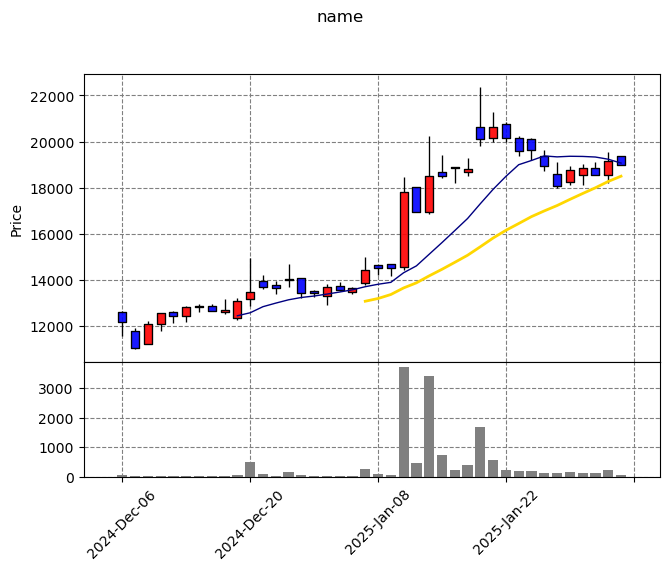

In [5]:
sss.plot_candlestick(df)

In [11]:
df.head()

,Open,High,Low,Close,Change,ChangeRate,Volume,TradingValue,Program,ForeignNetBuy,InstitutionNetBuy,IndividualNetBuy,10DMA,20DMA
datetime,,,,,,,,,,,,,,
2024-11-27,15040,15500,14330,14440,-750,-4.94,678688,101.88,-524,-34227,-31,548,NaN,NaN
2024-11-28,14310,15890,14140,14630,190,1.32,2332620,356.37,343,19242,1,-271,NaN,NaN
2024-11-29,14630,14840,14220,14310,-320,-2.19,343664,49.47,-376,-25924,-1,311,NaN,NaN
2024-12-02,14370,14640,13260,13330,-980,-6.85,499515,68.63,61,-1931,2,8,NaN,NaN
2024-12-03,13210,13810,13200,13710,380,2.85,309442,41.92,749,55426,0,-782,NaN,NaN


### 데이터수집 - 전처리 - DB저장 - DB에서 불러오기 - 시각화 (일봉)
- 하나의 모듈에 각각 5개의 클래스를 만들었음

In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import time
from TickerDict import tickers
import process

from pykiwoom.kiwoom import *
kiwoom = Kiwoom()

kiwoom.CommConnect(block=True)
print("블록킹 로그인 완료")

블록킹 로그인 완료


#### 데이터 수집 - 전처리 - DB저장(일봉)

In [7]:
get_data = process.GetData(kiwoom)
df = get_data.daily_candlestick('삼성전자','20250212')

prepro = process.Preprocess()
df = prepro.daily_candlestick(df)

data_save = process.DBsave()
data_save.daily_candlestick_create_table('삼성전자','20250212')
data_save.daily_candlestick_insert_data('삼성전자','20250212',df)
data_save.close()

In [10]:
print(data_save.conn.ping(reconnect=False)) #ping(): database와 연결상태 확인하는 매서드. 연결중이면 none이 표시됨.

None


#### 데이터 수집 - 전처리 - DB저장(daily_candlestick_save)

In [4]:
process.daily_candlestick_save(kiwoom,'샌즈랩','20250101')

{'trcode': 'opt10086', 'input': [{'일별주가요청': ['종목코드', '조회일자', '표시구분']}], 'output': [{'일별주가': ['날짜', '시가', '고가', '저가', '종가', '전일비', '등락률', '거래량', '금액(백만)', '신용비', '개인', '기관', '외인수량', '외국계', '프로그램', '외인비', '외인보유', '외인비중', '외인순매수', '기관순매수', '개인순매수', '신용잔고율']}]}
{'trcode': 'opt10086', 'input': [{'일별주가요청': ['종목코드', '조회일자', '표시구분']}], 'output': [{'일별주가': ['날짜', '시가', '고가', '저가', '종가', '전일비', '등락률', '거래량', '금액(백만)', '신용비', '개인', '기관', '외인수량', '외국계', '프로그램', '외인비', '외인보유', '외인비중', '외인순매수', '기관순매수', '개인순매수', '신용잔고율']}]}


#### DB에서 불러오기 - 시각화

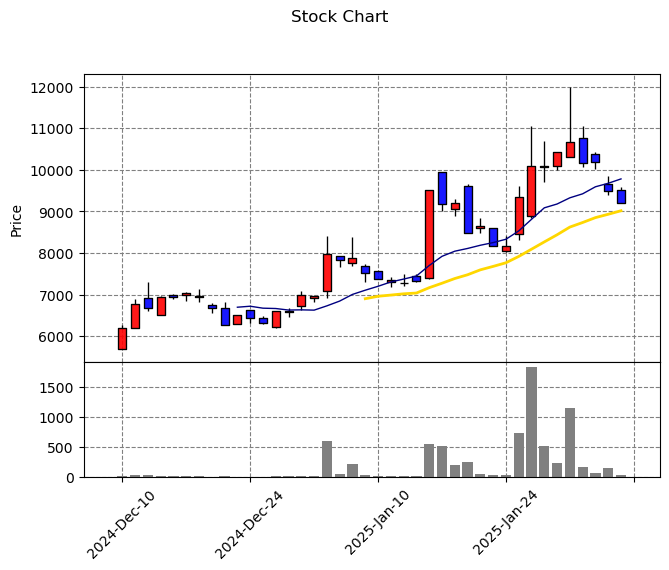

In [5]:
fig, axes = process.daily_candlestick_load('샌즈랩','20250101')

In [ ]:
fig, axes = load_and_visualize('유일에너테크', '20250211')
fig2, axes2 = load_and_visualize('유일에너테크', '20250210')
fig3, axes3 = load_and_visualize('유일에너테크', '20250219')

(<Figure size 800x575 with 4 Axes>,
 [<Axes:ylabel='Price'>, <Axes:>, <Axes:>, <Axes:>])

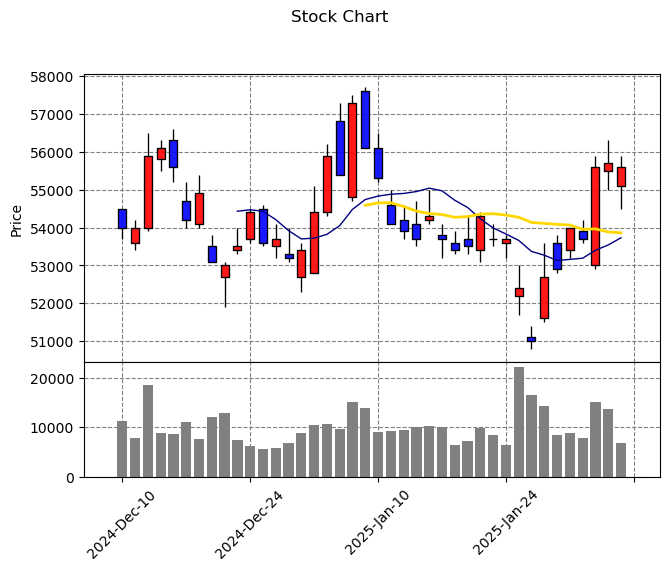

In [2]:
import process
data_load = process.DBload()
df = data_load.daily_candlestick('샌즈랩','20250101')
data_load.close()

visulization = process.Visualize()
visulization.add_moving_averages(df)
visulization.daily_candlestick(df)

### 데이터수집 - 전처리 - DB저장 - DB에서 불러오기 - 시각화 (분봉)

In [8]:
get_data = process.GetData(kiwoom)
df = get_data.minute_candlestick('삼성전자')

{'trcode': 'opt10080', 'input': [{'주식분봉차트조회요청': ['종목코드', '틱범위', '수정주가구분']}], 'output': [{'주식분차트': ['종목코드']}, {'주식분봉차트조회': ['현재가', '거래량', '체결시간', '시가', '고가', '저가', '수정주가구분', '수정비율', '대업종구분', '소업종구분', '종목정보', '수정주가이벤트', '전일종가']}]}


In [9]:
prepro_data = process.Preprocess()
df = prepro_data.minute_candlestick(df)

In [10]:
df

,Open,High,Low,Close,Volume,TradingValue
datetime,,,,,,
2025-02-13 10:37:00,56200,56200,56100,56200,2254,1.266
2025-02-13 10:36:00,56200,56200,56100,56100,8580,4.818
2025-02-13 10:35:00,56200,56200,56100,56100,8226,4.619
2025-02-13 10:34:00,56100,56200,56100,56200,21169,11.886
2025-02-13 10:33:00,56100,56200,56100,56200,19869,11.156
...,...,...,...,...,...,...
2025-02-12 10:04:00,54900,55000,54900,54900,8318,-4.569
2025-02-12 10:03:00,54900,55000,54900,54900,9019,-4.954
2025-02-12 10:02:00,54900,55000,54900,55000,6867,-3.773


In [11]:
data_save = process.DBsave()
data_save.minute_candlestick('전진건설로봇',df)

In [12]:
df

,Open,High,Low,Close,Volume,TradingValue
datetime,,,,,,
2025-02-13 10:07:00,67400,67500,67300,67400,3090,2.083
2025-02-13 10:06:00,67200,67500,67100,67500,5897,3.970
2025-02-13 10:05:00,67300,67400,67100,67300,5211,3.506
2025-02-13 10:04:00,67300,67500,67000,67300,11349,7.635
2025-02-13 10:03:00,67600,68000,67200,67300,28935,19.538
...,...,...,...,...,...,...
2025-02-12 09:30:00,57100,57100,56700,56700,12362,7.034
2025-02-12 09:29:00,57100,57200,57000,57000,4634,2.645
2025-02-12 09:28:00,57000,57100,57000,57000,4015,2.290


In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import time
from TickerDict import tickers
import process

In [2]:
data_load = process.DBload()
df = data_load.minute_candlestick('전진건설로봇')

In [3]:
df

,Open,High,Low,Close,Volume,TradingValue
datetime,,,,,,
2025-02-12 09:21:00,56900,57200,56800,56900,5729,3.263
2025-02-12 09:22:00,57000,57900,56900,57600,22342,12.813
2025-02-12 09:23:00,57700,57900,57500,57700,16210,9.353
2025-02-12 09:24:00,57700,57800,57400,57700,7297,4.207
2025-02-12 09:25:00,57600,57600,57400,57400,3651,2.099
...,...,...,...,...,...,...
2025-02-13 10:03:00,67600,68000,67200,67300,28935,19.538
2025-02-13 10:04:00,67300,67500,67000,67300,11349,7.635
2025-02-13 10:05:00,67300,67400,67100,67300,5211,3.506


In [4]:
data_visulization = process.Visualize()
data_visulization.minute_candlestick(df)

(<Figure size 15972.2x5750 with 4 Axes>,
 [<Axes:ylabel='Price'>, <Axes:>, <Axes:>, <Axes:>])

#### minute_candlestick_save

In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import time
from TickerDict import tickers
import process

from pykiwoom.kiwoom import *
kiwoom = Kiwoom()

kiwoom.CommConnect(block=True)
print("블록킹 로그인 완료")

블록킹 로그인 완료


In [5]:
get_data = process.GetData(kiwoom)
df = get_data.minute_candlestick('SG')

{'trcode': 'opt10080', 'input': [{'주식분봉차트조회요청': ['종목코드', '틱범위', '수정주가구분']}], 'output': [{'주식분차트': ['종목코드']}, {'주식분봉차트조회': ['현재가', '거래량', '체결시간', '시가', '고가', '저가', '수정주가구분', '수정비율', '대업종구분', '소업종구분', '종목정보', '수정주가이벤트', '전일종가']}]}


In [6]:
df

,현재가,거래량,체결시간,시가,고가,저가,수정주가구분,수정비율,대업종구분,소업종구분,종목정보,수정주가이벤트,전일종가
0,+3570,41580,20250213104700,+3570,+3575,+3570,,,,,,,
1,+3575,80500,20250213104600,+3585,+3585,+3570,,,,,,,
2,+3580,94637,20250213104500,+3585,+3590,+3575,,,,,,,
3,+3590,16886,20250213104400,+3595,+3595,+3585,,,,,,,
4,+3600,8205,20250213104300,+3595,+3600,+3590,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-3375,3802,20250210145800,-3375,3380,-3370,,,,,,,
896,-3375,8998,20250210145700,3380,3380,-3370,,,,,,,
897,-3375,6316,20250210145600,-3375,-3375,-3375,,,,,,,
898,3380,22236,20250210145500,-3375,3380,-3370,,,,,,,


In [7]:
process.minute_candlestick_save(kiwoom,'디아이씨')

{'trcode': 'opt10080', 'input': [{'주식분봉차트조회요청': ['종목코드', '틱범위', '수정주가구분']}], 'output': [{'주식분차트': ['종목코드']}, {'주식분봉차트조회': ['현재가', '거래량', '체결시간', '시가', '고가', '저가', '수정주가구분', '수정비율', '대업종구분', '소업종구분', '종목정보', '수정주가이벤트', '전일종가']}]}


,Open,High,Low,Close,Volume,TradingValue
datetime,,,,,,
2025-02-13 11:48:00,6100,6120,6090,6110,33793,2.063
2025-02-13 11:47:00,6090,6120,6070,6110,78996,4.817
2025-02-13 11:46:00,6040,6090,6030,6080,112823,6.837
2025-02-13 11:45:00,6110,6140,6030,6030,190880,11.601
2025-02-13 11:44:00,6150,6160,6090,6110,133269,8.166
...,...,...,...,...,...,...
2025-02-12 11:12:00,5260,5260,5250,5250,1165,0.000
2025-02-12 11:11:00,5250,5260,5250,5260,5177,0.000
2025-02-12 11:10:00,5260,5260,5250,5250,4716,0.000


#### minute_candlestick_load

In [8]:
import process
process.minute_candlestick_load('디아이씨')

(<Figure size 15972.2x5750 with 4 Axes>,
 [<Axes:ylabel='Price'>, <Axes:>, <Axes:>, <Axes:>])

## 수정모듈 적용 명령어(커널 재시작x)
- Jupyter Notebook에서는 모듈을 수정할 때마다 커널을 재시작하지 않고도 변경된 코드를 반영할 수 있도록 IPython의 %autoreload 확장을 사용할 수 있습니다. 이 기능을 사용하면, 수정한 모듈이 자동으로 재로드되어 코드를 다시 실행할 때 최신 버전의 코드가 적용됩니다.

In [3]:
%load_ext autoreload
%autoreload 2